In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Sohel&MeProject/teacher_rating_dataset_250_unique_indian_names.csv')

In [4]:
df.head()

,Teacher_ID,Name,Subject,Grade_Level,Effectiveness,Clarity,Communication,Engagement,Fairness,Approachability,Availability,Punctuality,Assessment_Quality,Feedback_Quality,Classroom_Management,Inclusivity,Technology_Integration,Professional_Development,Collaboration,Overall_Rating
0,1,Shivani,Science,Middle School,1,1,2,4,2,3,4,1,5,5,5,1,5,4,4,1
1,2,Parth,Math,Elementary,3,4,1,1,5,1,3,1,3,4,5,3,4,5,1,1
2,3,Manju,English,High School,4,3,3,1,3,4,3,4,4,4,1,4,3,2,4,5
3,4,Zara,English,Elementary,2,5,1,5,2,2,1,5,3,4,2,2,3,4,5,5
4,5,Manisha,English,Elementary,2,4,5,4,1,3,5,2,1,4,4,1,1,3,3,2


In [5]:
df.tail()

,Teacher_ID,Name,Subject,Grade_Level,Effectiveness,Clarity,Communication,Engagement,Fairness,Approachability,Availability,Punctuality,Assessment_Quality,Feedback_Quality,Classroom_Management,Inclusivity,Technology_Integration,Professional_Development,Collaboration,Overall_Rating
142,143,Prachi,English,Elementary,2,3,4,5,3,3,1,1,1,1,4,1,5,2,2,1
143,144,Pranjal,Math,Middle School,5,3,2,3,5,2,3,4,5,4,2,5,3,4,5,5
144,145,Rohan,Science,Middle School,5,1,1,1,1,4,3,4,2,1,1,1,3,4,4,3
145,146,Tejas,Science,Middle School,3,5,1,4,5,3,5,5,5,1,2,4,1,1,2,4
146,147,Juhi,English,High School,4,1,2,2,3,5,5,5,4,3,5,1,5,5,1,2


In [6]:
# Display basic information about the dataset
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Teacher_ID                147 non-null    int64 
 1   Name                      147 non-null    object
 2   Subject                   147 non-null    object
 3   Grade_Level               147 non-null    object
 4   Effectiveness             147 non-null    int64 
 5   Clarity                   147 non-null    int64 
 6   Communication             147 non-null    int64 
 7   Engagement                147 non-null    int64 
 8   Fairness                  147 non-null    int64 
 9   Approachability           147 non-null    int64 
 10  Availability              147 non-null    int64 
 11  Punctuality               147 non-null    int64 
 12  Assessment_Quality        147 non-null    int64 
 13  Feedback_Quality          147 non-null    int64 
 14  Classroom_Management      

In [7]:
# Display summary statistics
print(df.describe())

       Teacher_ID  Effectiveness     Clarity  Communication  Engagement  \
count  147.000000     147.000000  147.000000     147.000000  147.000000   
mean    74.000000       3.047619    3.122449       2.911565    2.965986   
std     42.579338       1.486622    1.493814       1.428310    1.444949   
min      1.000000       1.000000    1.000000       1.000000    1.000000   
25%     37.500000       2.000000    2.000000       2.000000    2.000000   
50%     74.000000       3.000000    3.000000       3.000000    3.000000   
75%    110.500000       4.000000    5.000000       4.000000    4.000000   
max    147.000000       5.000000    5.000000       5.000000    5.000000   

         Fairness  Approachability  Availability  Punctuality  \
count  147.000000       147.000000    147.000000   147.000000   
mean     2.959184         2.979592      2.925170     3.115646   
std      1.428082         1.401904      1.471596     1.392332   
min      1.000000         1.000000      1.000000     1.000000   

In [8]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)


Teacher_ID                  0
Name                        0
Subject                     0
Grade_Level                 0
Effectiveness               0
Clarity                     0
Communication               0
Engagement                  0
Fairness                    0
Approachability             0
Availability                0
Punctuality                 0
Assessment_Quality          0
Feedback_Quality            0
Classroom_Management        0
Inclusivity                 0
Technology_Integration      0
Professional_Development    0
Collaboration               0
Overall_Rating              0
dtype: int64


In [9]:
# Data Preprocessing
# Encode categorical variables
label_encoder_subject = LabelEncoder()
label_encoder_grade_level = LabelEncoder()
df['Subject'] = label_encoder_subject.fit_transform(df['Subject'])
df['Grade_Level'] = label_encoder_grade_level.fit_transform(df['Grade_Level'])

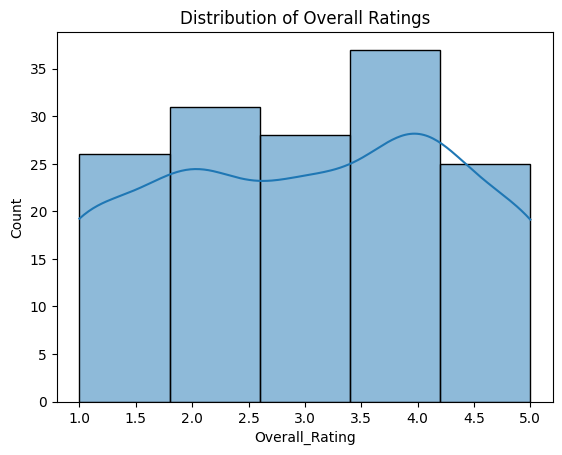

In [10]:
# Visualize the distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Overall_Rating'], bins=5, kde=True)
plt.title('Distribution of Overall Ratings')
plt.show()


<ipython-input-11-1c367ee1d089>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


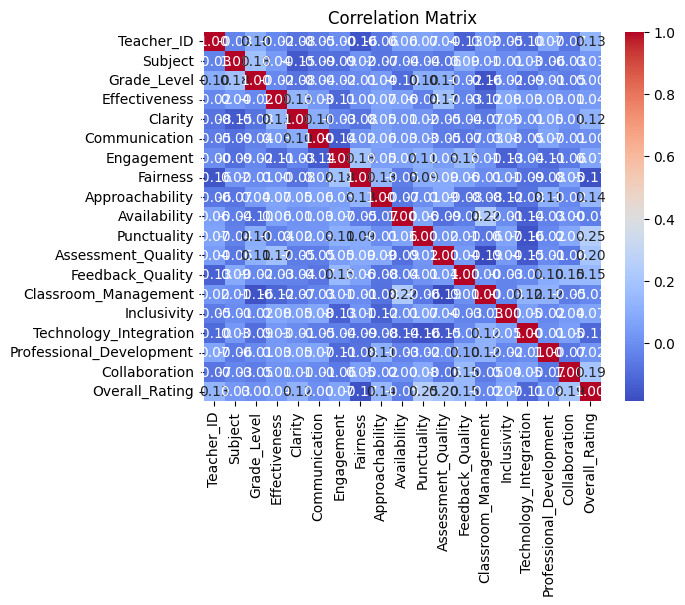

In [11]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


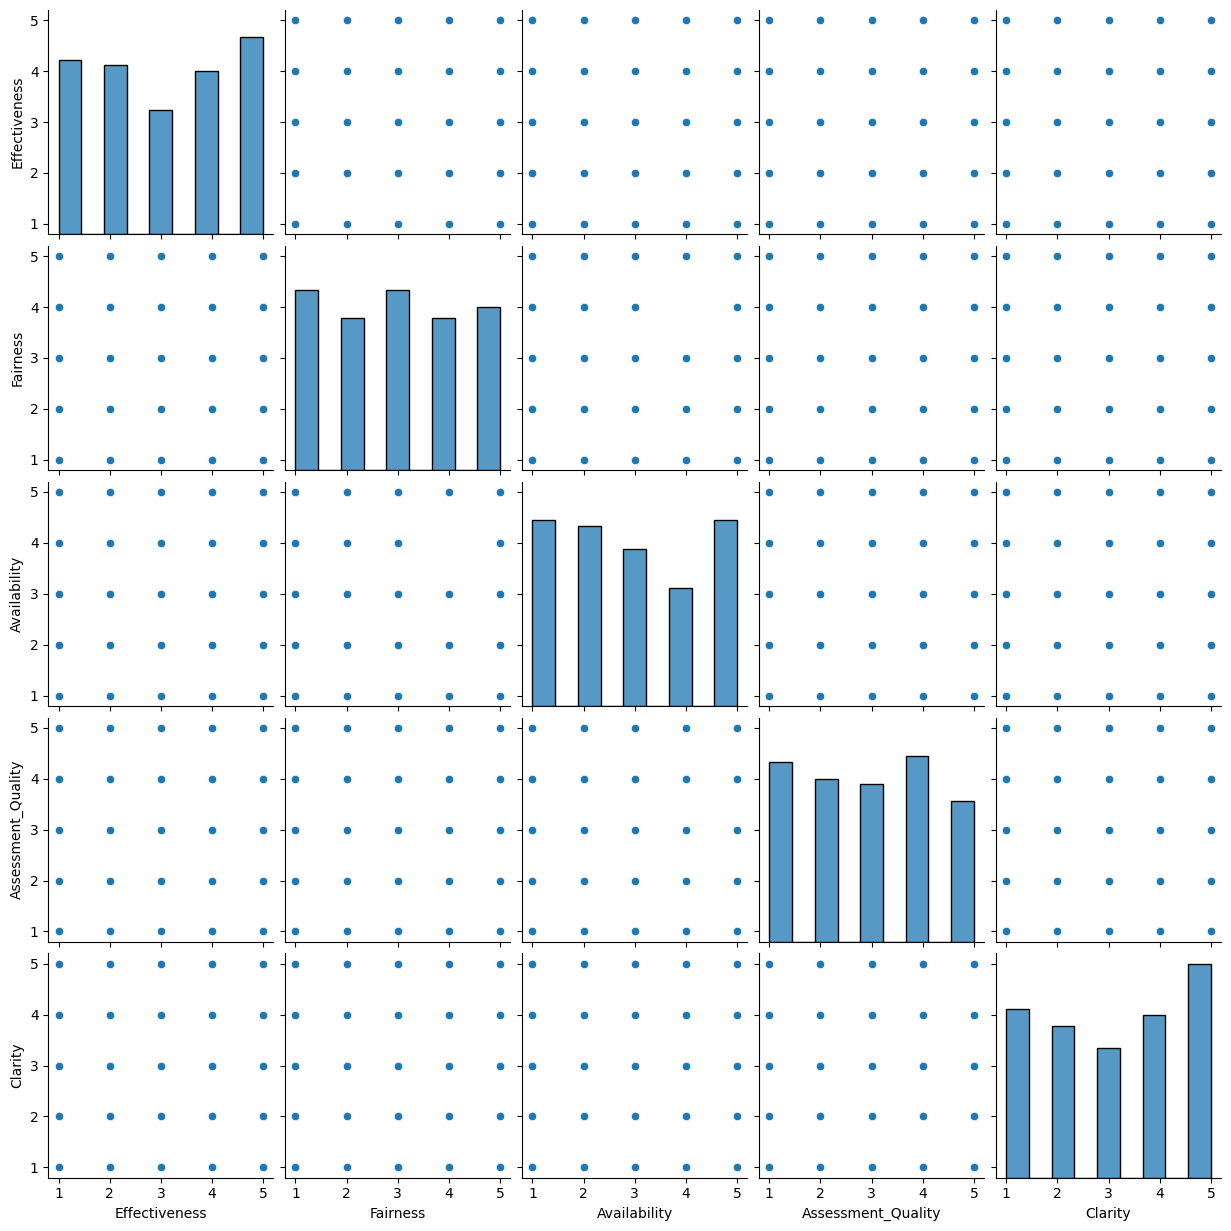

In [12]:
# Pairplot for selected columns
sns.pairplot(df[['Effectiveness', 'Fairness', 'Availability', 'Assessment_Quality', 'Clarity']])
plt.show()


In [13]:
# Select relevant features
selected_features = ['Effectiveness', 'Fairness', 'Availability', 'Assessment_Quality', 'Clarity', 'Subject', 'Grade_Level', 'Overall_Rating', 'Name', 'Teacher_ID']
df_selected = df[selected_features]

In [14]:
# Split the data into features (X) and target variable (y)
X = df_selected.drop(['Overall_Rating', 'Name', 'Teacher_ID'], axis=1)
y = df_selected['Overall_Rating']

In [15]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Model Training
model = DecisionTreeRegressor(random_state=42)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Fit the Decision Tree model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

[5. 4. 4. 3. 2. 2. 5. 5. 4. 3. 3. 4. 1. 3. 2. 4. 4. 3. 4. 5. 4. 3. 2. 4.
 3. 2. 4. 5. 2. 2.]


In [20]:
# Evaluate the model for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.1666666666666665
R-squared: -0.6156462585034013


In [21]:
# Alternatively, you can use cross-validation for a more robust evaluation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse.mean()}')


Cross-validated RMSE: 1.8552157638145352


In [22]:
# For a decision tree, you can also visualize the tree structure
tree_rules = export_text(model, feature_names=X.columns.tolist())
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- Assessment_Quality <= -0.31
|   |--- Fairness <= 0.38
|   |   |--- Clarity <= -1.09
|   |   |   |--- Effectiveness <= -1.04
|   |   |   |   |--- Availability <= -0.63
|   |   |   |   |   |--- Grade_Level <= 0.54
|   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |   |--- Grade_Level >  0.54
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- Availability >  -0.63
|   |   |   |   |   |--- value: [1.00]
|   |   |   |--- Effectiveness >  -1.04
|   |   |   |   |--- Availability <= -0.97
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- Availability >  -0.97
|   |   |   |   |   |--- Availability <= -0.29
|   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |--- Availability >  -0.29
|   |   |   |   |   |   |--- value: [3.00]
|   |   |--- Clarity >  -1.09
|   |   |   |--- Effectiveness <= 0.31
|   |   |   |   |--- Availability <= -0.97
|   |   |   |   |   |--- Assessment_Quality <= -1.02
|   |   |   |   |   |   |--- Effective

In [23]:
# Example: Convert ratings into classes (you can adjust the threshold as needed)
threshold = 3.5
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Evaluate the classification performance
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
classification_rep = classification_report(y_test_class, y_pred_class)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[12  9]
 [ 3  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67        21
           1       0.40      0.67      0.50         9

    accuracy                           0.60        30
   macro avg       0.60      0.62      0.58        30
weighted avg       0.68      0.60      0.62        30



In [24]:
# Calculate accuracy
accuracy = np.mean(y_pred_class == y_test_class)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6


In [29]:

# Get user input for subject and grade level
subject_input = input("Enter the subject: ")
grade_level_input = input("Enter the grade level: ")

# Filter the dataframe based on subject and grade level
filtered_df = df_selected[(df_selected['Subject'] == label_encoder_subject.transform([subject_input])[0]) & (df_selected['Grade_Level'] == label_encoder_grade_level.transform([grade_level_input])[0])]

if filtered_df.empty:
    print(f"No data available for the specified subject '{subject_input}' and grade level '{grade_level_input}'.")
else:
    # Use the filtered dataset for training the model
    model.fit(X_scaled[y.index.isin(filtered_df.index)], y[y.index.isin(filtered_df.index)])

    # Prediction Function
    def predict_top_teachers(model, scaler, df, top_k=5):
        input_data = filtered_df[['Effectiveness', 'Fairness', 'Availability', 'Assessment_Quality', 'Clarity', 'Subject', 'Grade_Level']]
        input_scaled = scaler.transform(input_data)
        predicted_rating = model.predict(input_scaled)

        # Combine predictions with teacher names and IDs
        results = df[['Name', 'Teacher_ID', 'Overall_Rating']].copy()
        results['Predicted_Rating'] = model.predict(scaler.transform(df[['Effectiveness', 'Fairness', 'Availability', 'Assessment_Quality', 'Clarity', 'Subject', 'Grade_Level']]))

        # Select top teachers
        top_teachers = results.nlargest(top_k, 'Predicted_Rating')[['Name', 'Teacher_ID', 'Predicted_Rating']]

        return top_teachers

    # Example Usage
    top_teachers = predict_top_teachers(model, scaler, df_selected)
    print(top_teachers)

Enter the subject: Math
Enter the grade level: High School
      Name  Teacher_ID  Predicted_Rating
0  Shivani           1               4.0
1    Parth           2               4.0
3     Zara           4               4.0
5   Pranav           6               4.0
6  Yashika           7               4.0
